In [2]:
pip install yfinance pandas requests beautifulsoup4 html5lib plotly


Note: you may need to restart the kernel to use updated packages.


Question 1: Stock Tesla Data (head):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  

Question 2: Tesla revenue data (tail):
    Date Revenue
10  2014  $3,198
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117

Question 3: GameStop Stock Data (head):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.6

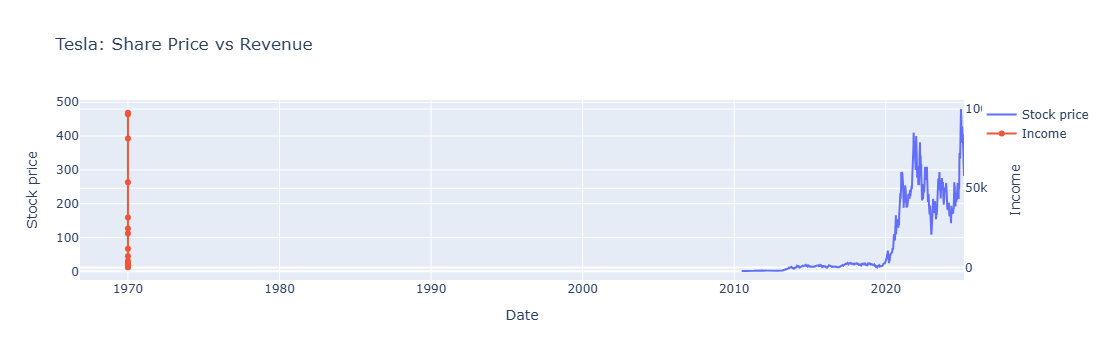


Question 6: Showing the GameStop chart...


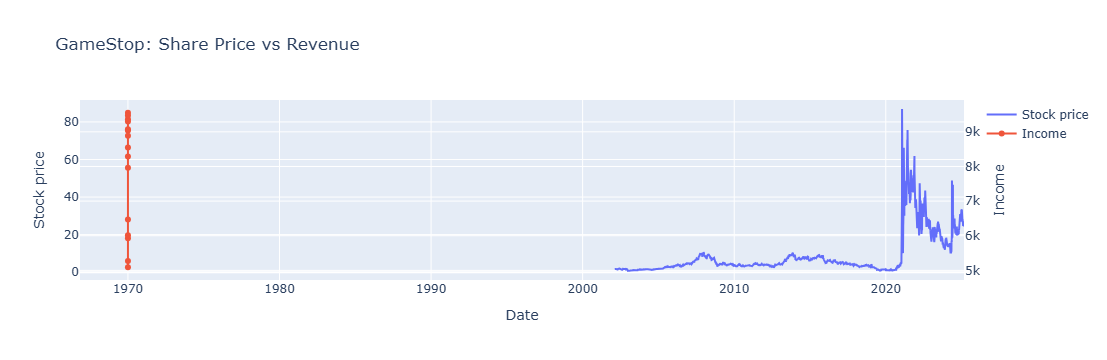

In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import plotly.graph_objects as go

# -------------------------------
# Question 1: Use yfinance to Extract Stock Data for Tesla
# -------------------------------
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Question 1: Stock Tesla Data (head):")
print(tesla_data.head())

# -------------------------------
# Question 2: Use Webscraping to Extract Tesla Revenue Data
# -------------------------------
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response_tesla = requests.get(url_tesla, headers=headers)

soup_tesla = BeautifulSoup(response_tesla.text, "html.parser")
tables_tesla = soup_tesla.find_all("table")

if tables_tesla:
    try:
        tesla_revenue = pd.read_html(StringIO(str(tables_tesla[0])), flavor="bs4")[0]
        tesla_revenue.columns = ["Date", "Revenue"]
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[:-1]  # Delete last row if irrelevant
        print("\nQuestion 2: Tesla revenue data (tail):")
        print(tesla_revenue.tail())
    except Exception as e:
        print("Error extracting Tesla revenue data:", e)
        tesla_revenue = None
else:
    print("Tesla revenue table not found.")
    tesla_revenue = None


# -------------------------------
# Question 3: Use yfinance to Extract Stock Data for GameStop
# -------------------------------
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("\nQuestion 3: GameStop Stock Data (head):")
print(gme_data.head())


# -------------------------------
# Question 4: Use Webscraping to Extract GME Revenue Data
# -------------------------------
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response_gme = requests.get(url_gme, headers=headers)
soup_gme = BeautifulSoup(response_gme.text, "html.parser")
tables_gme = soup_gme.find_all("table")

if tables_gme:
    try:
        gme_revenue = pd.read_html(StringIO(str(tables_gme[0])), flavor="bs4")[0]
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue.dropna(inplace=True)
        gme_revenue = gme_revenue[:-1]  # Eliminar última fila si es irrelevante
        print("\nQuestion 4: GameStop Revenue Data (tail):")
        print(gme_revenue.tail())
    except Exception as e:
        print("Error extracting GameStop revenue data:", e)
        gme_revenue = None
else:
    print("GameStop revenue table not found.")
    gme_revenue = None


# -------------------------------
# Function to create the graph using Plotly
# -------------------------------
def make_graph(stock_data, revenue_data, title):
    # Convert 'Date' to datetime and clear 'Revenue'
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    revenue_data['Revenue'] = revenue_data['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)
    
    fig = go.Figure()
    # Add trace for stock price
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'],
                             name="Stock price"))
    # Add trace for revenue on a secondary axis
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'],
                             name="Income", yaxis="y2"))
    
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis=dict(title="Stock price"),
        yaxis2=dict(title="Income", overlaying="y", side="right")
    )
    fig.show()

# -------------------------------
# Question 5: Plot Tesla Stock Graph
# -------------------------------
if tesla_revenue is not None:
    print("\nQuestion 5: Showing the Tesla graph...")
    make_graph(tesla_data, tesla_revenue, "Tesla: Share Price vs Revenue")
else:
    print("Tesla chart could not be created due to lack of revenue data.")


# -------------------------------
# Question 6: Plot GameStop Stock Graph
# -------------------------------
if gme_revenue is not None:
    print("\nQuestion 6: Showing the GameStop chart...")
    make_graph(gme_data, gme_revenue, "GameStop: Share Price vs Revenue")
else:
    print("GameStop chart could not be created due to lack of revenue data.")



In [12]:
# Q1: Extraer datos de acciones de Tesla con yfinance
# -------------------------------
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Datos de acciones de Tesla:")
print(tesla_data.head())

Datos de acciones de Tesla:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [14]:
# Question 2: Use Webscraping to Extract Tesla Revenue Data
# -------------------------------
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response_tesla = requests.get(url_tesla, headers=headers)

soup_tesla = BeautifulSoup(response_tesla.text, "html.parser")
tables_tesla = soup_tesla.find_all("table")

if tables_tesla:
    try:
        tesla_revenue = pd.read_html(StringIO(str(tables_tesla[0])), flavor="bs4")[0]
        tesla_revenue.columns = ["Date", "Revenue"]
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[:-1]  # Delete last row if irrelevant
        print("\nQuestion 2: Tesla revenue data (tail):")
        print(tesla_revenue.tail())
    except Exception as e:
        print("Error extracting Tesla revenue data:", e)
        tesla_revenue = None
else:
    print("Tesla revenue table not found.")
    tesla_revenue = None



Question 2: Tesla revenue data (tail):
    Date Revenue
10  2014  $3,198
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117


In [16]:
# Question 3: Use yfinance to Extract Stock Data for GameStop
# -------------------------------
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("\nQuestion 3: GameStop Stock Data (head):")
print(gme_data.head())


Question 3: GameStop Stock Data (head):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674833   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
# Question 4: Use Webscraping to Extract GME Revenue Data
# -------------------------------
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response_gme = requests.get(url_gme, headers=headers)
soup_gme = BeautifulSoup(response_gme.text, "html.parser")
tables_gme = soup_gme.find_all("table")

if tables_gme:
    try:
        gme_revenue = pd.read_html(StringIO(str(tables_gme[0])), flavor="bs4")[0]
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue.dropna(inplace=True)
        gme_revenue = gme_revenue[:-1]  # Eliminar última fila si es irrelevante
        print("\nQuestion 4: GameStop Revenue Data (tail):")
        print(gme_revenue.tail())
    except Exception as e:
        print("Error extracting GameStop revenue data:", e)
        gme_revenue = None
else:
    print("GameStop revenue table not found.")
    gme_revenue = None


# -------------------------------
# Function to create the graph using Plotly
# -------------------------------
def make_graph(stock_data, revenue_data, title):
    # Convert 'Date' to datetime and clear 'Revenue'
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    revenue_data['Revenue'] = revenue_data['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)
    
    fig = go.Figure()
    # Add trace for stock price
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'],
                             name="Stock price"))
    # Add trace for revenue on a secondary axis
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'],
                             name="Income", yaxis="y2"))
    
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis=dict(title="Stock price"),
        yaxis2=dict(title="Income", overlaying="y", side="right")
    )
    fig.show()



Question 4: GameStop Revenue Data (tail):
    Date Revenue
10  2014  $9,040
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078



Question 5: Showing the Tesla graph...


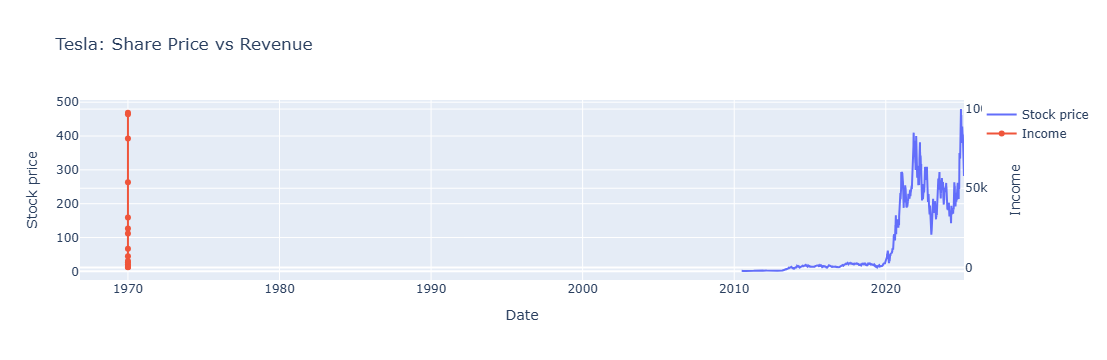

In [20]:
# Question 5: Plot Tesla Stock Graph
# -------------------------------
if tesla_revenue is not None:
    print("\nQuestion 5: Showing the Tesla graph...")
    make_graph(tesla_data, tesla_revenue, "Tesla: Share Price vs Revenue")
else:
    print("Tesla chart could not be created due to lack of revenue data.")


Question 6: Showing the GameStop chart...


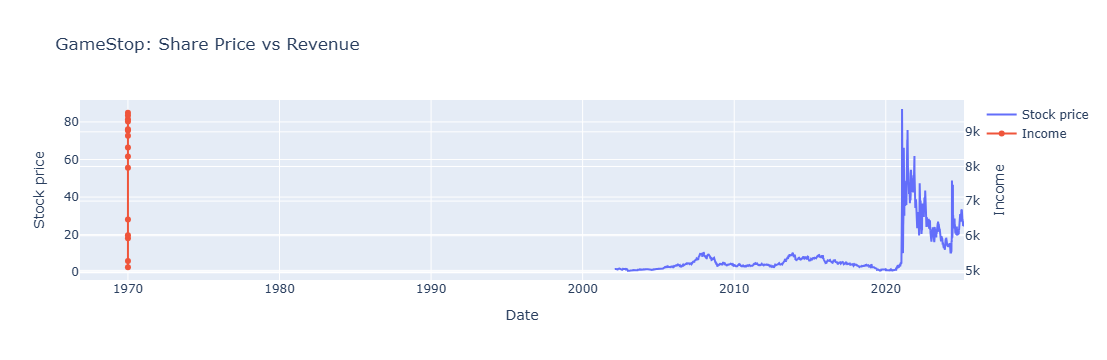

In [22]:
# Question 6: Plot GameStop Stock Graph
# -------------------------------
if gme_revenue is not None:
    print("\nQuestion 6: Showing the GameStop chart...")
    make_graph(gme_data, gme_revenue, "GameStop: Share Price vs Revenue")
else:
    print("GameStop chart could not be created due to lack of revenue data.")
